In [211]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [212]:
df=pd.read_csv("Skyserver_SQL2_27_2018 6_51_39 PM.csv")
df

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.240000e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752.0,301.0,4.0,267,3.720000e+18,STAR,-0.000009,3306.0,54922.0,491
1,1.240000e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752.0,301.0,4.0,267,3.640000e+17,STAR,-0.000055,323.0,51615.0,541
2,1.240000e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752.0,301.0,4.0,268,3.230000e+17,GALAXY,0.123111,287.0,52023.0,513
3,1.240000e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752.0,301.0,4.0,269,3.720000e+18,STAR,-0.000111,3306.0,54922.0,510
4,1.240000e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752.0,301.0,4.0,269,3.720000e+18,STAR,0.000590,3306.0,54922.0,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.240000e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345.0,301.0,3.0,161,5.030000e+17,GALAXY,0.027583,447.0,51877.0,246
9996,1.240000e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345.0,301.0,3.0,162,5.030000e+17,GALAXY,0.117772,447.0,51877.0,228
9997,1.240000e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345.0,301.0,3.0,162,8.220000e+18,STAR,-0.000402,7303.0,57013.0,622
9998,1.240000e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345.0,301.0,3.0,163,5.030000e+17,GALAXY,0.014019,447.0,51877.0,229


In [213]:
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.240000e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752.0,301.0,4.0,267,3.720000e+18,STAR,-0.000009,3306.0,54922.0,491
1,1.240000e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752.0,301.0,4.0,267,3.640000e+17,STAR,-0.000055,323.0,51615.0,541
2,1.240000e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752.0,301.0,4.0,268,3.230000e+17,GALAXY,0.123111,287.0,52023.0,513
3,1.240000e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752.0,301.0,4.0,269,3.720000e+18,STAR,-0.000111,3306.0,54922.0,510
4,1.240000e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752.0,301.0,4.0,269,3.720000e+18,STAR,0.000590,3306.0,54922.0,512


In [214]:
df.tail()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
9995,1.240000e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345.0,301.0,3.0,161,5.030000e+17,GALAXY,0.027583,447.0,51877.0,246
9996,1.240000e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345.0,301.0,3.0,162,5.030000e+17,GALAXY,0.117772,447.0,51877.0,228
9997,1.240000e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345.0,301.0,3.0,162,8.220000e+18,STAR,-0.000402,7303.0,57013.0,622
9998,1.240000e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345.0,301.0,3.0,163,5.030000e+17,GALAXY,0.014019,447.0,51877.0,229
9999,1.240000e+18,131.665012,51.805307,19.27586,17.37829,16.30542,15.83548,15.50588,1345.0,301.0,3.0,163,5.030000e+17,GALAXY,0.118417,447.0,51877.0,233


In [215]:
df.dtypes

objid        float64
ra           float64
dec          float64
u            float64
g            float64
r            float64
i            float64
z            float64
run          float64
rerun        float64
camcol       float64
field          int64
specobjid    float64
class         object
redshift     float64
plate        float64
mjd          float64
fiberid        int64
dtype: object

In [216]:
df.columns

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

In [217]:
df.info

<bound method DataFrame.info of              objid          ra        dec         u         g         r  \
0     1.240000e+18  183.531326   0.089693  19.47406  17.04240  15.94699   
1     1.240000e+18  183.598370   0.135285  18.66280  17.21449  16.67637   
2     1.240000e+18  183.680207   0.126185  19.38298  18.19169  17.47428   
3     1.240000e+18  183.870529   0.049911  17.76536  16.60272  16.16116   
4     1.240000e+18  183.883288   0.102557  17.55025  16.26342  16.43869   
...            ...         ...        ...       ...       ...       ...   
9995  1.240000e+18  131.316413  51.539547  18.81777  17.47053  16.91508   
9996  1.240000e+18  131.306083  51.671341  18.27255  17.43849  17.07692   
9997  1.240000e+18  131.552562  51.666986  18.75818  17.77784  17.51872   
9998  1.240000e+18  131.477151  51.753068  18.88287  17.91068  17.53152   
9999  1.240000e+18  131.665012  51.805307  19.27586  17.37829  16.30542   

             i         z     run  rerun  camcol  field     specobji

In [218]:
df.describe

<bound method NDFrame.describe of              objid          ra        dec         u         g         r  \
0     1.240000e+18  183.531326   0.089693  19.47406  17.04240  15.94699   
1     1.240000e+18  183.598370   0.135285  18.66280  17.21449  16.67637   
2     1.240000e+18  183.680207   0.126185  19.38298  18.19169  17.47428   
3     1.240000e+18  183.870529   0.049911  17.76536  16.60272  16.16116   
4     1.240000e+18  183.883288   0.102557  17.55025  16.26342  16.43869   
...            ...         ...        ...       ...       ...       ...   
9995  1.240000e+18  131.316413  51.539547  18.81777  17.47053  16.91508   
9996  1.240000e+18  131.306083  51.671341  18.27255  17.43849  17.07692   
9997  1.240000e+18  131.552562  51.666986  18.75818  17.77784  17.51872   
9998  1.240000e+18  131.477151  51.753068  18.88287  17.91068  17.53152   
9999  1.240000e+18  131.665012  51.805307  19.27586  17.37829  16.30542   

             i         z     run  rerun  camcol  field     specob

In [219]:
df.isna().sum()

objid          0
ra             0
dec           26
u            102
g             91
r             77
i             77
z             95
run           13
rerun         13
camcol         5
field          0
specobjid      0
class          0
redshift       0
plate         10
mjd           10
fiberid        0
dtype: int64

In [220]:
df['dec'].unique

<bound method Series.unique of 0        0.089693
1        0.135285
2        0.126185
3        0.049911
4        0.102557
          ...    
9995    51.539547
9996    51.671341
9997    51.666986
9998    51.753068
9999    51.805307
Name: dec, Length: 10000, dtype: float64>

In [221]:
df['u'].unique

<bound method Series.unique of 0       19.47406
1       18.66280
2       19.38298
3       17.76536
4       17.55025
          ...   
9995    18.81777
9996    18.27255
9997    18.75818
9998    18.88287
9999    19.27586
Name: u, Length: 10000, dtype: float64>

In [222]:
df['g'].unique

<bound method Series.unique of 0       17.04240
1       17.21449
2       18.19169
3       16.60272
4       16.26342
          ...   
9995    17.47053
9996    17.43849
9997    17.77784
9998    17.91068
9999    17.37829
Name: g, Length: 10000, dtype: float64>

In [223]:
df['r'].unique

<bound method Series.unique of 0       15.94699
1       16.67637
2       17.47428
3       16.16116
4       16.43869
          ...   
9995    16.91508
9996    17.07692
9997    17.51872
9998    17.53152
9999    16.30542
Name: r, Length: 10000, dtype: float64>

In [224]:
df['i'].unique

<bound method Series.unique of 0       15.50342
1       16.48922
2       17.08732
3       15.98233
4       16.55492
          ...   
9995    16.68305
9996    16.71661
9997    17.43302
9998    17.36284
9999    15.83548
Name: i, Length: 10000, dtype: float64>

In [225]:
df['z'].unique

<bound method Series.unique of 0       15.22531
1       16.39150
2       16.80125
3       15.90438
4       16.61326
          ...   
9995    16.50570
9996    16.69897
9997    17.42048
9998    17.13988
9999    15.50588
Name: z, Length: 10000, dtype: float64>

In [226]:
df['run'].unique

<bound method Series.unique of 0        752.0
1        752.0
2        752.0
3        752.0
4        752.0
         ...  
9995    1345.0
9996    1345.0
9997    1345.0
9998    1345.0
9999    1345.0
Name: run, Length: 10000, dtype: float64>

In [227]:
df['rerun'].unique

<bound method Series.unique of 0       301.0
1       301.0
2       301.0
3       301.0
4       301.0
        ...  
9995    301.0
9996    301.0
9997    301.0
9998    301.0
9999    301.0
Name: rerun, Length: 10000, dtype: float64>

In [228]:
df['camcol'].unique

<bound method Series.unique of 0       4.0
1       4.0
2       4.0
3       4.0
4       4.0
       ... 
9995    3.0
9996    3.0
9997    3.0
9998    3.0
9999    3.0
Name: camcol, Length: 10000, dtype: float64>

In [229]:
df['plate'].unique

<bound method Series.unique of 0       3306.0
1        323.0
2        287.0
3       3306.0
4       3306.0
         ...  
9995     447.0
9996     447.0
9997    7303.0
9998     447.0
9999     447.0
Name: plate, Length: 10000, dtype: float64>

In [230]:
df['mjd'].unique

<bound method Series.unique of 0       54922.0
1       51615.0
2       52023.0
3       54922.0
4       54922.0
         ...   
9995    51877.0
9996    51877.0
9997    57013.0
9998    51877.0
9999    51877.0
Name: mjd, Length: 10000, dtype: float64>

In [231]:
df['dec']=df['dec'].fillna(df['dec'].mean())
df['u']=df['u'].fillna(df['u'].mean())
df['g']=df['g'].fillna(df['g'].mean())
df['r']=df['r'].fillna(df['r'].mean())
df['i']=df['i'].fillna(df['i'].mean())
df['z']=df['z'].fillna(df['z'].mean())
df['run']=df['run'].fillna(df['run'].mean())
df['rerun']=df['rerun'].fillna(df['rerun'].mean())
df['camcol']=df['camcol'].fillna(df['camcol'].mean())
df['plate']=df['plate'].fillna(df['plate'].mean())
df['mjd']=df['mjd'].fillna(df['mjd'].mean())

In [232]:
df.isna().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

In [233]:
df.drop(['objid', 'specobjid','rerun'],inplace=True,axis=1)

C:\Users\rohith preethan\AppData\Local\Temp\ipykernel_39632\3613682765.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(data=df, x='class', palette='pastel')


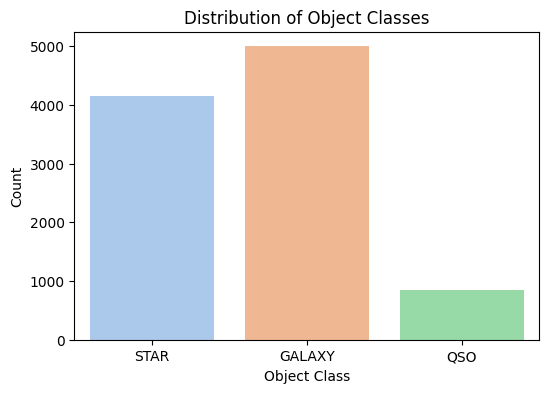

In [234]:
plt.figure(figsize=(6, 4))
sb.countplot(data=df, x='class', palette='pastel')
plt.title("Distribution of Object Classes")
plt.xlabel("Object Class")
plt.ylabel("Count")
plt.show()


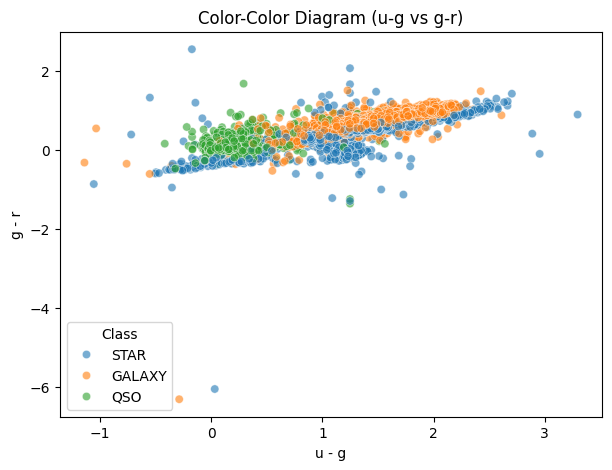

In [188]:
df['u_g'] = df['u'] - df['g']
df['g_r'] = df['g'] - df['r']

plt.figure(figsize=(7, 5))
sb.scatterplot(data=df, x='u_g', y='g_r', hue='class', alpha=0.6)
plt.title("Color-Color Diagram (u-g vs g-r)")
plt.xlabel("u - g")
plt.ylabel("g - r")
plt.legend(title="Class")
plt.show()


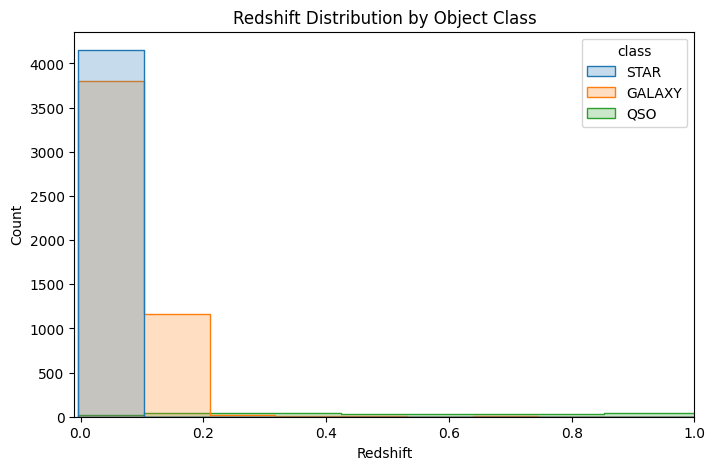

In [189]:
plt.figure(figsize=(8, 5))
sb.histplot(data=df, x='redshift', hue='class', element='step', common_norm=False, bins=50)
plt.title("Redshift Distribution by Object Class")
plt.xlabel("Redshift")
plt.ylabel("Count")
plt.xlim(-0.01, 1)  # optional: to zoom in
plt.show()


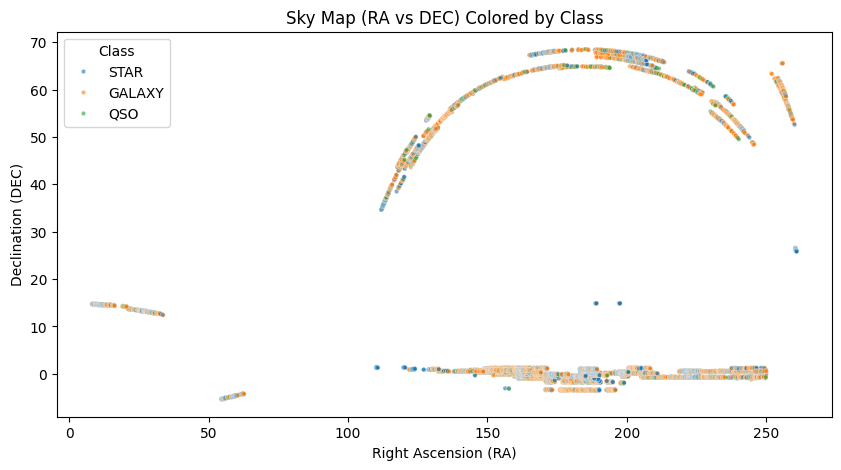

In [190]:
plt.figure(figsize=(10, 5))
sb.scatterplot(data=df, x='ra', y='dec', hue='class', s=10, alpha=0.6)
plt.title("Sky Map (RA vs DEC) Colored by Class")
plt.xlabel("Right Ascension (RA)")
plt.ylabel("Declination (DEC)")
plt.legend(title="Class")
plt.show()


<Axes: >

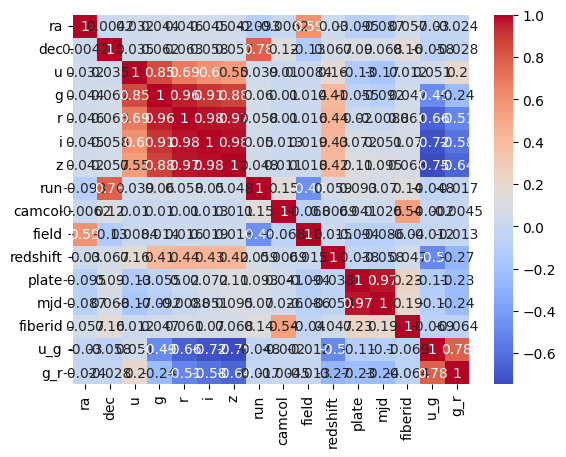

In [191]:
corr=df.corr(numeric_only=True)
sb.heatmap(corr,annot=True,cmap='coolwarm')

C:\Users\rohith preethan\AppData\Local\Temp\ipykernel_39632\1244505162.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(data=df, x='class', y='r', palette='Set2')


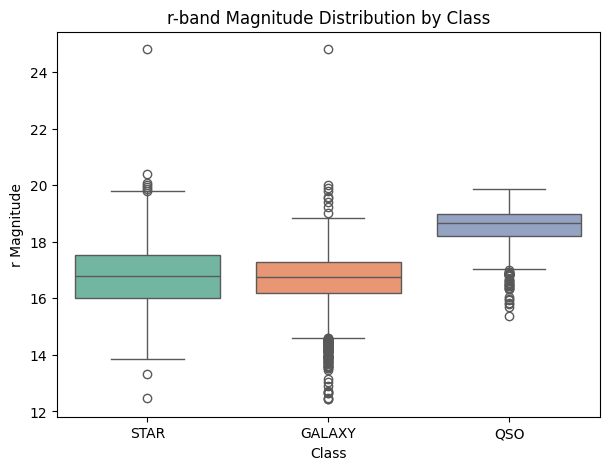

In [192]:
plt.figure(figsize=(7, 5))
sb.boxplot(data=df, x='class', y='r', palette='Set2')
plt.title("r-band Magnitude Distribution by Class")
plt.xlabel("Class")
plt.ylabel("r Magnitude")
plt.show()


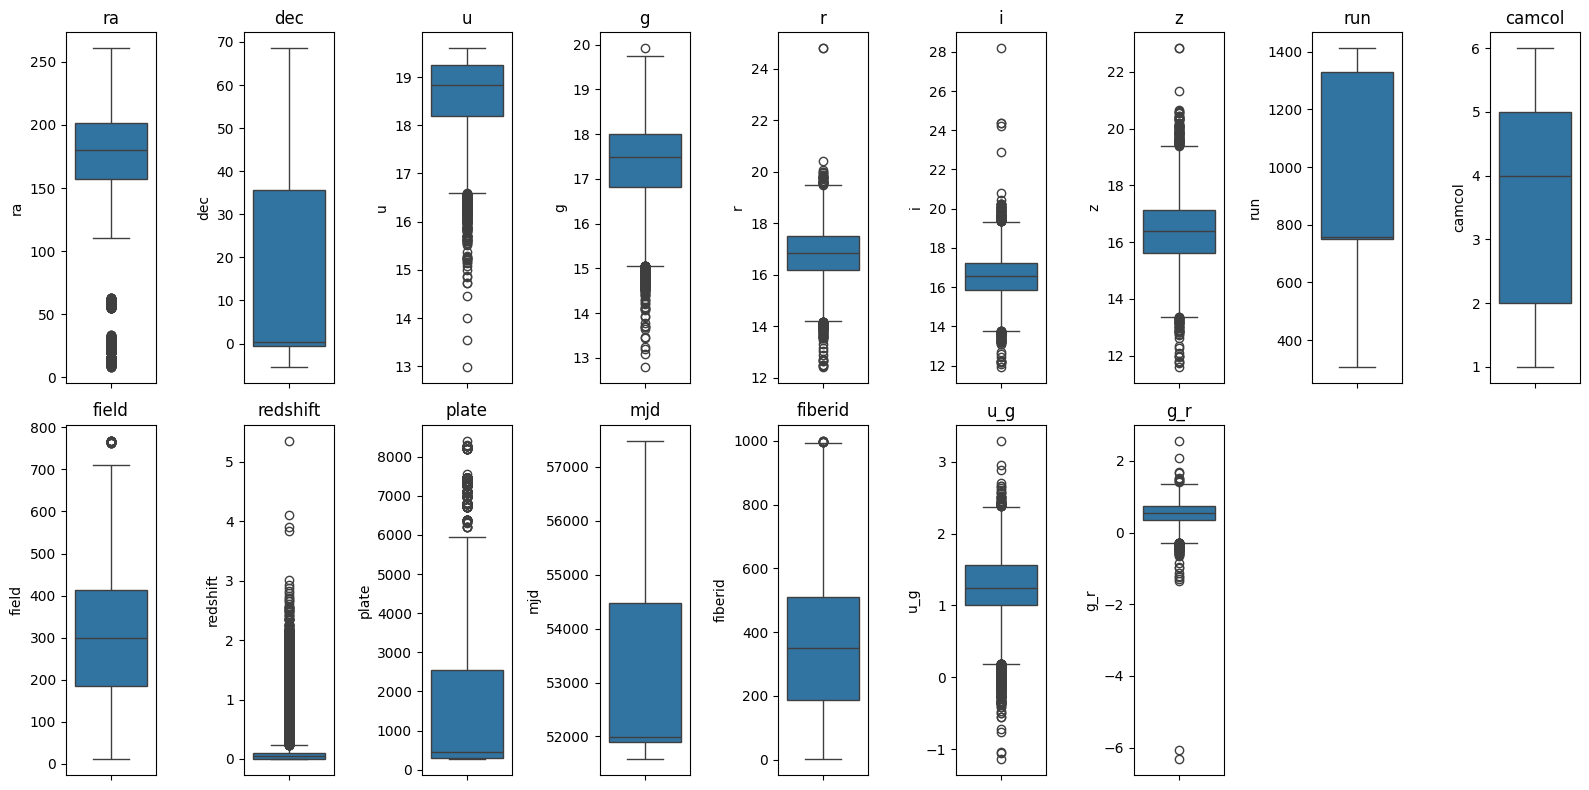

In [193]:
num_col=df.select_dtypes(include="number").columns
plt.figure(figsize=(16,8))
for i,col in enumerate(num_col):
    plt.subplot(2,len(num_col)//2 + 1, i+1)
    sb.boxplot(df[col])
    plt.title(f'{col}')
plt.tight_layout()
plt.show()

In [194]:
outlier_columns=['ra','dec','u','g','r','i','z','run','camcol','field','redshift','plate','mjd','fiberid','u_g','g_r']
for col in outlier_columns:
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    lower=Q1-1.5*IQR
    upper=Q3+1.5*IQR
    print(col)
    upper_array=np.array(df[col] >= upper)
    print("upper_bound",upper)
    print(upper_array.sum())

    lower_array=np.array(df[col] <= lower)
    print("lower_bound",lower)
    print(lower_array.sum())

    mean=df[col].mean()
    for i in df.index:
        if ((df.loc[i,col]>=upper) or (df.loc[i,col]<=lower)):
            df.loc[i,col]=mean

ra
upper_bound 267.81177836250004
0
lower_bound 91.10644646249999
508
dec
upper_bound 89.932043809625
0
lower_bound -54.821682329375
0
u
upper_bound 20.858646250000003
0
lower_bound 16.586956249999997
280
g
upper_bound 19.773322499999995
1
lower_bound 15.055762500000004
179
r
upper_bound 19.496057500000003
31
lower_bound 14.191237499999996
78
i
upper_bound 19.342065
67
lower_bound 13.770624999999999
55
z
upper_bound 19.393916250000004
83
lower_bound 13.366366249999997
46
run
upper_bound 2199.5
0
lower_bound -116.5
0
camcol
upper_bound 9.5
0
lower_bound -2.5
0
field
upper_bound 759.0
25
lower_bound -161.0
0


C:\Users\rohith preethan\AppData\Local\Temp\ipykernel_39632\2419513865.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '302.3801' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[i,col]=mean


redshift
upper_bound 0.23132492500000001
809
lower_bound -0.13866551500000002
0
plate
upper_bound 5946.0
493
lower_bound -3086.0
0
mjd
upper_bound 58320.0
0
lower_bound 48048.0
0
fiberid
upper_bound 994.875
8
lower_bound -298.125
0


C:\Users\rohith preethan\AppData\Local\Temp\ipykernel_39632\2419513865.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '353.0694' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[i,col]=mean


u_g
upper_bound 2.3782087500000033
40
lower_bound 0.18895874999999496
509
g_r
upper_bound 1.375776249999992
10
lower_bound -0.2804337499999918
134


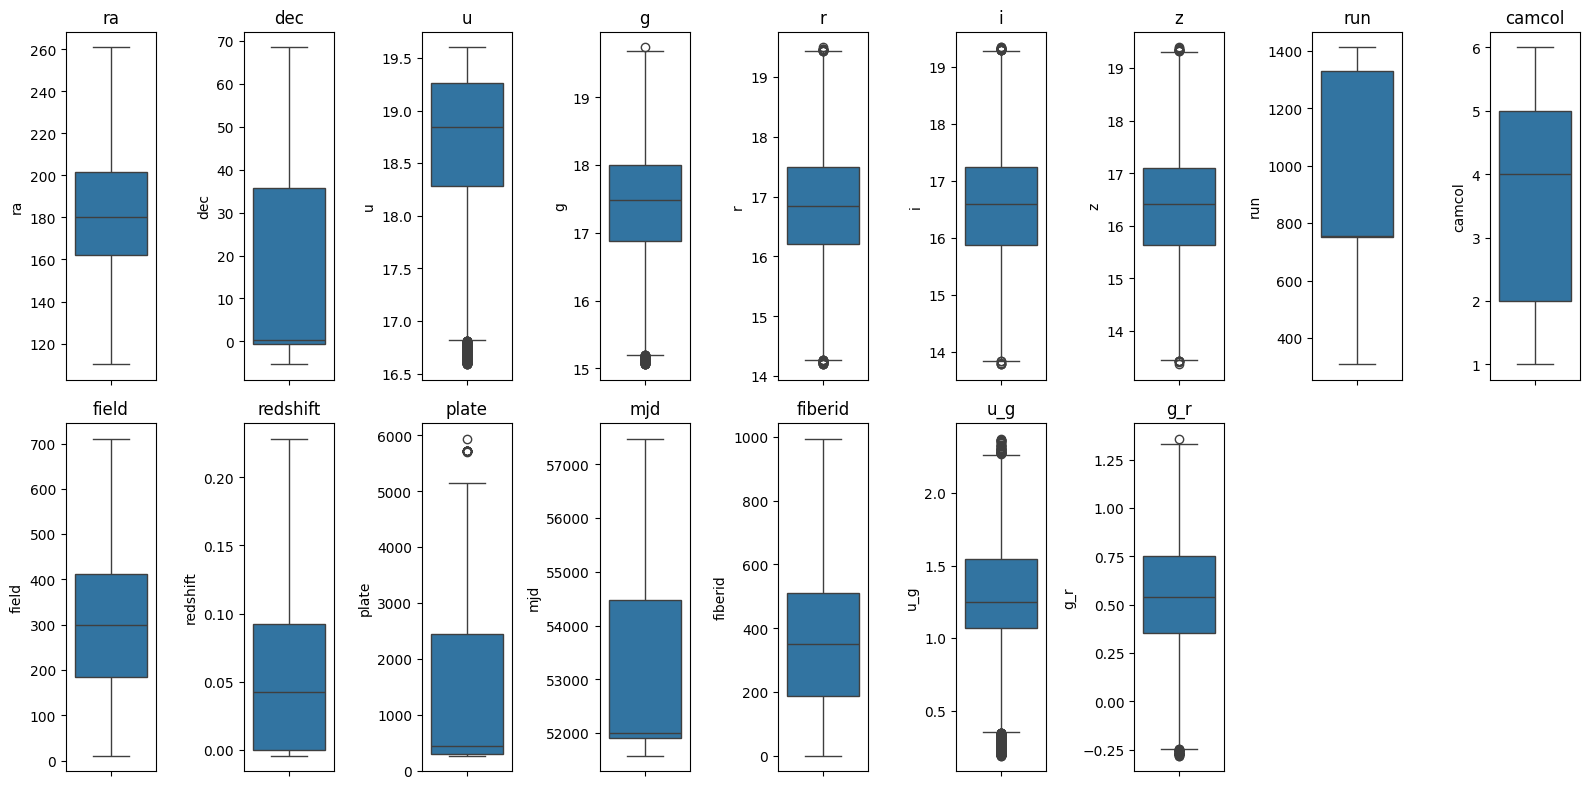

In [195]:
num_col=df.select_dtypes(include="number").columns
plt.figure(figsize=(16,8))
for i,col in enumerate(num_col):
    plt.subplot(2,len(num_col)//2 + 1, i+1)
    sb.boxplot(df[col])
    plt.title(f'{col}')
plt.tight_layout()
plt.show()

In [196]:
x=df.drop(['class'],axis=1).values
y=df['class'].values

In [197]:
x

array([[1.83531326e+02, 8.96930300e-02, 1.94740600e+01, ...,
        4.91000000e+02, 1.24739586e+00, 1.09541000e+00],
       [1.83598370e+02, 1.35285032e-01, 1.86628000e+01, ...,
        5.41000000e+02, 1.44831000e+00, 5.38120000e-01],
       [1.83680207e+02, 1.26185092e-01, 1.93829800e+01, ...,
        5.13000000e+02, 1.19129000e+00, 7.17410000e-01],
       ...,
       [1.31552562e+02, 5.16669864e+01, 1.87581800e+01, ...,
        6.22000000e+02, 9.80340000e-01, 2.59120000e-01],
       [1.31477151e+02, 5.17530678e+01, 1.88828700e+01, ...,
        2.29000000e+02, 9.72190000e-01, 3.79160000e-01],
       [1.31665012e+02, 5.18053075e+01, 1.92758600e+01, ...,
        2.33000000e+02, 1.89757000e+00, 1.07287000e+00]],
      shape=(10000, 16))

In [198]:
y

array(['STAR', 'STAR', 'GALAXY', ..., 'STAR', 'GALAXY', 'GALAXY'],
      shape=(10000,), dtype=object)

In [199]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train

array([[ 1.38195324e+02,  5.61477458e+01,  1.87195700e+01, ...,
         3.17000000e+02,  1.74774000e+00,  9.56940000e-01],
       [ 2.23894290e+02, -7.92164381e-01,  1.94449900e+01, ...,
         9.50000000e+01,  1.27958000e+00,  5.28410000e-01],
       [ 2.57178951e+02,  5.71495917e+01,  1.95096000e+01, ...,
         3.13000000e+02,  1.63165000e+00,  8.09310000e-01],
       ...,
       [ 2.36162158e+02,  5.20677502e+01,  1.92731800e+01, ...,
         3.03000000e+02,  1.04492000e+00,  5.08120000e-01],
       [ 2.39543230e+02, -8.78780660e-02,  1.72771100e+01, ...,
         1.56000000e+02,  1.34264000e+00, -4.35300000e-02],
       [ 1.28635481e+02,  4.97232252e+01,  1.90941700e+01, ...,
         4.48000000e+02,  9.39710000e-01,  2.67870000e-01]],
      shape=(7000, 16))

In [200]:
x_test

array([[ 1.34649267e+02,  5.43863445e+01,  1.88183500e+01, ...,
         5.38000000e+02,  1.88954000e+00,  9.18780000e-01],
       [ 1.57095224e+02,  6.25973927e+01,  1.93468600e+01, ...,
         7.76000000e+02,  1.24739586e+00,  3.07400000e-02],
       [ 1.59606276e+02, -1.78599830e-02,  1.81988400e+01, ...,
         2.77000000e+02,  1.23317000e+00,  4.78740000e-01],
       ...,
       [ 1.71951129e+02, -4.83295411e-01,  1.85382100e+01, ...,
         4.90000000e+02,  3.11740000e-01, -2.00370000e-01],
       [ 2.46673544e+02, -7.43972859e-01,  1.92069300e+01, ...,
         9.90000000e+01,  1.45984000e+00,  7.90610000e-01],
       [ 1.30525882e+02,  5.16009691e+01,  1.88977000e+01, ...,
         5.27000000e+02,  9.38300000e-01,  3.51350000e-01]],
      shape=(3000, 16))

In [201]:
y_train

array(['GALAXY', 'GALAXY', 'GALAXY', ..., 'GALAXY', 'STAR', 'STAR'],
      shape=(7000,), dtype=object)

In [202]:
y_test

array(['GALAXY', 'QSO', 'GALAXY', ..., 'STAR', 'STAR', 'GALAXY'],
      shape=(3000,), dtype=object)

In [203]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
scalar.fit(x_train)
x_train=scalar.transform(x_train)
x_test=scalar.transform(x_test)
x_train

array([[-1.34574112,  1.64065692,  0.04766871, ..., -0.1638126 ,
         1.09824997,  1.47200929],
       [ 1.23183533, -0.62319562,  1.06963626, ..., -1.24224259,
        -0.06797831, -0.06234723],
       [ 2.23294143,  1.68048894,  1.16065846, ..., -0.18324377,
         0.80905944,  0.9434184 ],
       ...,
       [ 1.60081723,  1.47844191,  0.82759131, ..., -0.2318217 ,
        -0.65253728, -0.13499581],
       [ 1.70251006, -0.59519417, -1.9844607 , ..., -0.94591723,
         0.08910977, -2.11018488],
       [-1.63327345,  1.38522682,  0.57540305, ...,  0.47255825,
        -0.91462477, -0.99521365]], shape=(7000, 16))

In [204]:
x_test

array([[-1.4523962 ,  1.57062603,  0.18682941, ...,  0.9097596 ,
         1.45148641,  1.33537698],
       [-0.7772869 ,  1.89708601,  0.93139128, ...,  2.06591428,
        -0.14815186, -1.84426031],
       [-0.70176174, -0.59241034, -0.68593274, ..., -0.35812431,
        -0.18358975, -0.24019123],
       ...,
       [-0.33046436, -0.61091542, -0.20783022, ...,  0.67658555,
        -2.478954  , -2.67175228],
       [ 1.91696923, -0.62127959,  0.73425869, ..., -1.22281142,
         0.38106542,  0.87646284],
       [-1.57641567,  1.45988333,  0.29861723, ...,  0.85632388,
        -0.9181372 , -0.69631257]], shape=(3000, 16))

In [205]:
knn = KNeighborsClassifier(n_neighbors=7)
bayes = BernoulliNB()
sup = SVC()
decision = DecisionTreeClassifier(criterion='entropy')
randomn = RandomForestClassifier()
lst = [knn,bayes,sup,decision,randomn]

In [206]:
for i in lst:
    print(f'model is : {i}')
    i.fit(x_train,y_train)
    y_pred = i.predict(x_test)
    cm = confusion_matrix(y_test,y_pred)
    acc = accuracy_score(y_test,y_pred)
    cls = classification_report(y_test,y_pred)
    print("-"*100)
    print("confusion matrix : ")
    print(cm)
    print("-"*100)
    print("confusion matrix display : ")
    print("-"*100)
    print("accuracy score : ")
    print(acc)
    print("-"*100)
    print("classification result : ")
    print(cls)

model is : KNeighborsClassifier(n_neighbors=7)
----------------------------------------------------------------------------------------------------
confusion matrix : 
[[1428    9   60]
 [  20  263    3]
 [  69    0 1148]]
----------------------------------------------------------------------------------------------------
confusion matrix display : 
----------------------------------------------------------------------------------------------------
accuracy score : 
0.9463333333333334
----------------------------------------------------------------------------------------------------
classification result : 
              precision    recall  f1-score   support

      GALAXY       0.94      0.95      0.95      1497
         QSO       0.97      0.92      0.94       286
        STAR       0.95      0.94      0.95      1217

    accuracy                           0.95      3000
   macro avg       0.95      0.94      0.95      3000
weighted avg       0.95      0.95      0.95      3000

mod

In [207]:
print(knn.predict(scalar.transform([[700.598370,0.135285,45.66280,17.21449,16.67637,16.48922,16.39150,232.0,4.0,267.0,-0.000055,113.00000,23415.0,541.0,1.458310,0.53812]])))

['GALAXY']


In [208]:
print(bayes.predict(scalar.transform([[200.598370,0.135285,15.66280,17.21449,16.67637,16.48922,56.39150,232.0,4.0,267.0,-0.000055,113.00000,23415.0,541.0,1.458310,0.53812]])))

['STAR']


In [209]:
import pickle

# Save the trained model to a pickle file
with open("sky_server.pkl", "wb") as f:
    pickle.dump(randomn, f)

#st.success("📝 Model saved as 'trained_model.pkl'")
